# Criminal Image Classification

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
from zipfile import ZipFile

In [4]:
# extracting the data into colab
drive_path = "/content/drive/MyDrive/Colab Notebooks/New Criminal photos.zip"
with ZipFile(drive_path, "r") as zip_ref:
  zip_ref.extractall(path="/content/dataset/")

In [3]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import os

In [5]:
train_dir = "/content/dataset/"

In [6]:
for dirpath, dirname, filename in os.walk(train_dir):
  print(f"Path: {dirpath}\nNo. of files: {len(filename)}")

Path: /content/dataset/
No. of files: 0
Path: /content/dataset/Muthu Vishal
No. of files: 400
Path: /content/dataset/athithyan
No. of files: 412
Path: /content/dataset/Chandru
No. of files: 415
Path: /content/dataset/prakash
No. of files: 416
Path: /content/dataset/Saravanan
No. of files: 475


In [ ]:
# Creating dataset
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    directory=train_dir,
    label_mode="int",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
)

Found 2118 files belonging to 5 classes.


In [ ]:
len(train_dataset)

67

In [ ]:
class_names = train_dataset.class_names
class_names

['Chandru', 'Muthu Vishal', 'Saravanan', 'athithyan', 'prakash']

In [ ]:
sample_img, sample_label = next(iter(train_dataset))
sample_img.shape, sample_label.shape

(TensorShape([32, 224, 224, 3]), TensorShape([32]))

In [ ]:
sample_label[:5]

<tf.Tensor: shape=(5,), dtype=int32, numpy=array([3, 0, 0, 0, 2], dtype=int32)>

In [ ]:
sample_img[0].shape

TensorShape([224, 224, 3])

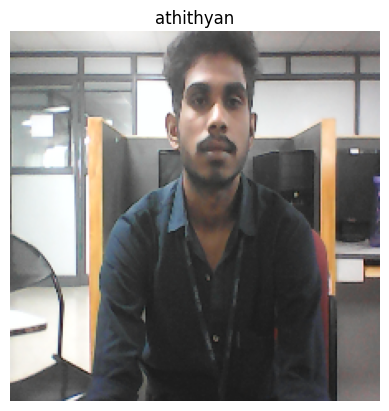

In [ ]:
# plotting an image
img = sample_img[0]/255.
label = sample_label[0]

plt.imshow(img)
plt.title(class_names[label])
plt.axis(False);

In [ ]:
# creating data augmentation layer
data_augmentation_layer = tf.keras.Sequential([
    tf.keras.layers.RandomRotation(factor=0.3),
    tf.keras.layers.RandomFlip(mode="horizontal"),
    tf.keras.layers.RandomZoom(height_factor=(-0.2, -0.3)),
])
data_augmentation_layer

In [ ]:
sample_img = tf.expand_dims(sample_img[0]/255., axis=0)
sample_img.shape

TensorShape([1, 224, 224, 3])

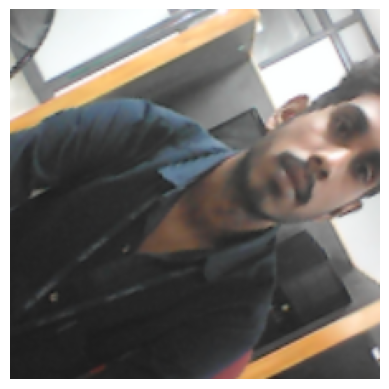

In [ ]:
plt.imshow(tf.squeeze(data_augmentation_layer(sample_img))) # check with the same shape as train data
plt.axis(False);

In [ ]:
aug_img = data_augmentation_layer(sample_img)
aug_img.shape

TensorShape([1, 224, 224, 3])

In [ ]:
data_augmentation_layer.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_rotation (RandomRot  (1, 224, 224, 3)          0         
 ation)                                                          
                                                                 
 random_flip (RandomFlip)    (1, 224, 224, 3)          0         
                                                                 
 random_zoom (RandomZoom)    (1, 224, 224, 3)          0         
                                                                 
Total params: 0 (0.00 Byte)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
for dirpath, dirname, filename in os.walk(train_dir):
  print(f"Path: {dirpath}\nNo. of files: {len(filename)}")

Path: /content/dataset/
No. of files: 0
Path: /content/dataset/athithyan
No. of files: 412
Path: /content/dataset/Muthu Vishal
No. of files: 400
Path: /content/dataset/Chandru
No. of files: 415
Path: /content/dataset/prakash
No. of files: 416
Path: /content/dataset/Saravanan
No. of files: 475


In [13]:
# Creating a new dataset with augmented images
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    directory=train_dir,
    label_mode="int",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
)

Found 2118 files belonging to 5 classes.


In [14]:
class_names = train_dataset.class_names
class_names

['Chandru', 'Muthu Vishal', 'Saravanan', 'athithyan', 'prakash']

In [ ]:
sample_img, sample_label = next(iter(train_dataset))
sample_img.shape, sample_label.shape

(TensorShape([32, 224, 224, 3]), TensorShape([32]))

In [ ]:
# setting random seed
tf.random.set_seed(42)

# creating a model
model_1 = tf.keras.Sequential([
    data_augmentation_layer,
    tf.keras.layers.Input(shape=(224, 224, 3)),

    tf.keras.layers.Rescaling(1/255.),

    tf.keras.layers.Conv2D(filters=256, kernel_size=2, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),

    tf.keras.layers.Conv2D(filters=256, kernel_size=2, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),

    tf.keras.layers.Conv2D(filters=256, kernel_size=2, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(len(class_names), activation="softmax")
], name="Conv2d_model")

model_1.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="Adam",
    metrics=["accuracy"]
)

model_1_history = model_1.fit(train_dataset, epochs=20)

Epoch 1/20
67/67 [==============================] - 180s 2s/step - loss: 1.4767 - accuracy: 0.3532
Epoch 2/20
67/67 [==============================] - 165s 2s/step - loss: 0.8876 - accuracy: 0.6634
Epoch 3/20
67/67 [==============================] - 165s 2s/step - loss: 0.6662 - accuracy: 0.7587
Epoch 4/20
67/67 [==============================] - 155s 2s/step - loss: 0.4265 - accuracy: 0.8513
Epoch 5/20
67/67 [==============================] - 166s 2s/step - loss: 0.4035 - accuracy: 0.8503
Epoch 6/20
67/67 [==============================] - 166s 2s/step - loss: 0.3532 - accuracy: 0.8772
Epoch 7/20
67/67 [==============================] - 166s 2s/step - loss: 0.2892 - accuracy: 0.9023
Epoch 8/20
67/67 [==============================] - 167s 2s/step - loss: 0.4531 - accuracy: 0.8371
Epoch 9/20
67/67 [==============================] - 165s 2s/step - loss: 0.2891 - accuracy: 0.8905
Epoch 10/20
67/67 [==============================] - 164s 2s/step - loss: 0.2878 - accuracy: 0.9032
Epoch 11/

In [10]:
def preprocess(img_path):
  """
  Preprocesses the image for prediction
  """
  img = tf.io.read_file(img_path)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.resize(img, size=(224, 224))
  img = tf.expand_dims(img, axis=0)

  return img

In [ ]:
def plot_loss_curves(model_history, val_curve=False):
  """
  Plots the given model's loss and accuracy curves
  """
  train_acc = model_history["accuracy"]
  train_loss = model_history["loss"]

  if val_curve:
    val_acc = model_history["val_accuracy"]
    val_loss = model_history["val_loss"]
    plot = 2

  else:
    plot = 1

  plt.figure(figsize=(10, 7))
  plt.subplot(plot, 2, 1)
  plt.plot(train_acc, label="Train_Accuracy")
  plt.legend();

  plt.subplot(plot, 2, 2)
  plt.plot(train_loss, label="Train_Loss", c="r")

  plt.title("Loss and Accuracy Curves")
  plt.legend();

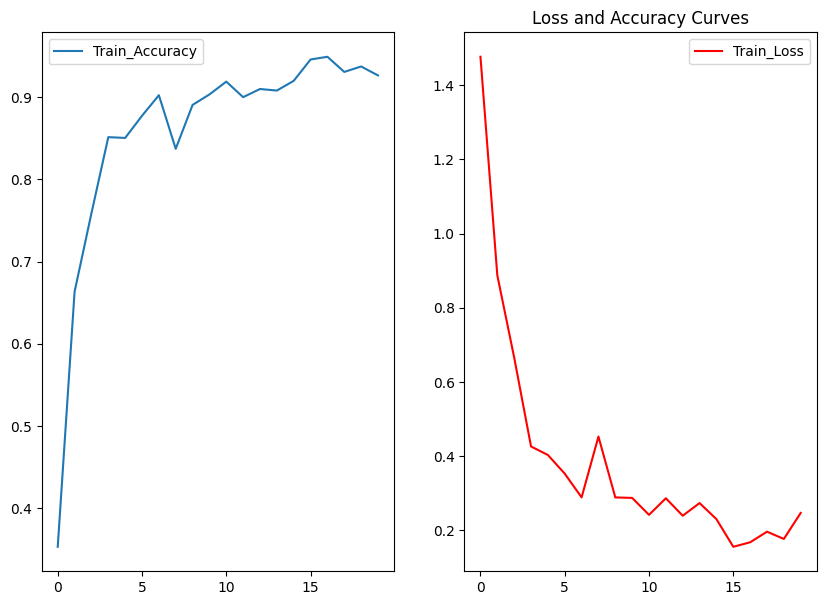

In [ ]:
plot_loss_curves(model_1_history.history)

In [ ]:
model_1.evaluate(train_dataset)

67/67 [==============================] - 161s 2s/step - loss: 0.1994 - accuracy: 0.9457


[0.1994340568780899, 0.9457035064697266]

len(pred_probs[0])

In [ ]:
# predicted class name
pred_class = class_names[pred_probs.argmax(axis=1).item()]
pred_class

'saravanan'

In [8]:
def custom_image(img_path, model, org_class):
  """
  Plots the given image and make prediction
  """
  img = preprocess(img_path)
  pred_probs = model.predict(img)
  pred_class = pred_probs.argmax(axis=1).item()
  pred_class = class_names[pred_class]
  pred_prob = pred_probs.max(axis=1)[0]*100

  if pred_class == org_class:
    color="g"
  else:
    color="r"

  plt.imshow(tf.squeeze(img)/255.)
  plt.axis(False)
  plt.suptitle(f"Actual: {org_class}", c="g")
  plt.title(f"Pred: {pred_class} | Prob: {pred_prob:.2f} %", c=color);

In [ ]:
custom_image(img_path="/content/photo_2023-10-07_23-14-04.jpg",
             model=model_1,
             org_class="Muthu Vishal")

In [ ]:
# saving the model
model_1.save(filepath="/content/drive/MyDrive/Colab Notebooks/model_1_Conv2D")

In [ ]:
# load the saved model
loaded_model = tf.keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/model_1_Conv2D")
loaded_model.summary()

Model: "Conv2d_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 input_1 (InputLayer)        multiple                  0         
                                                                 
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 223, 223, 256)     3328      
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 256)     0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 110, 110, 256)     262400    
                                                      

In [ ]:
from zipfile import ZipFile
#  extracting the augmented data into colab
drive_path = "/content/drive/MyDrive/Colab Notebooks/Test data.zip"
with ZipFile(drive_path, "r") as zip_ref:
  zip_ref.extractall(path="/content/Test data")

In [ ]:
# Creating a new dataset with augmented images
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    directory="/content/Test data/Test data/",
    label_mode="int",
    batch_size=32,
    image_size=(224, 224),
    shuffle=False,
)

Found 39 files belonging to 5 classes.


In [ ]:
loaded_model.evaluate(test_dataset)

2/2 [==============================] - 5s 583ms/step - loss: 2.4084 - accuracy: 0.6410


[2.408432722091675, 0.6410256624221802]

In [ ]:
# load the saved model
loaded_model = tf.keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/model_1_Conv2D.h5")
loaded_model.summary()

Model: "Conv2d_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 223, 223, 256)     3328      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 256)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 110, 110, 256)     262400    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 55, 55, 256)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 54, 54, 256)      

In [ ]:
# creating model 2 with efficientnetv2b0
effnet_layer = tf.keras.applications.EfficientNetV2B0(include_top=False)
effnet_layer.trainable=False
effnet_layer.summary()

24274472/24274472 [==============================] - 0s 0us/step
Model: "efficientnetv2-b0"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, None, None, 3)        0         ['input_1[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, None, None, 3)        0         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 stem_conv (Conv2

In [ ]:
tf.random.set_seed(42)
model_2 = tf.keras.Sequential([
    data_augmentation_layer,
    tf.keras.layers.Input(shape=(224, 224, 3)),
    effnet_layer,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(len(class_names), activation="softmax")
])

model_2.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="Adam",
    metrics=["accuracy"]
)
model_2_results = model_2.fit(train_dataset, epochs=20)

Epoch 1/20
67/67 [==============================] - 184s 2s/step - loss: 1.0631 - accuracy: 0.7776
Epoch 2/20
67/67 [==============================] - 158s 2s/step - loss: 0.4918 - accuracy: 0.9093
Epoch 3/20
67/67 [==============================] - 162s 2s/step - loss: 0.4164 - accuracy: 0.9268
Epoch 4/20
67/67 [==============================] - 157s 2s/step - loss: 0.3622 - accuracy: 0.9457
Epoch 5/20
67/67 [==============================] - 156s 2s/step - loss: 0.2236 - accuracy: 0.9613
Epoch 6/20
67/67 [==============================] - 159s 2s/step - loss: 0.2857 - accuracy: 0.9509
Epoch 7/20
67/67 [==============================] - 161s 2s/step - loss: 0.3627 - accuracy: 0.9533
Epoch 8/20
67/67 [==============================] - 159s 2s/step - loss: 0.3210 - accuracy: 0.9570
Epoch 9/20
67/67 [==============================] - 159s 2s/step - loss: 0.2816 - accuracy: 0.9627
Epoch 10/20
67/67 [==============================] - 154s 2s/step - loss: 0.2094 - accuracy: 0.9693
Epoch 11/

In [ ]:
model_2.evaluate(train_dataset)

67/67 [==============================] - 165s 2s/step - loss: 0.2685 - accuracy: 0.9773


[0.268521785736084, 0.977337121963501]

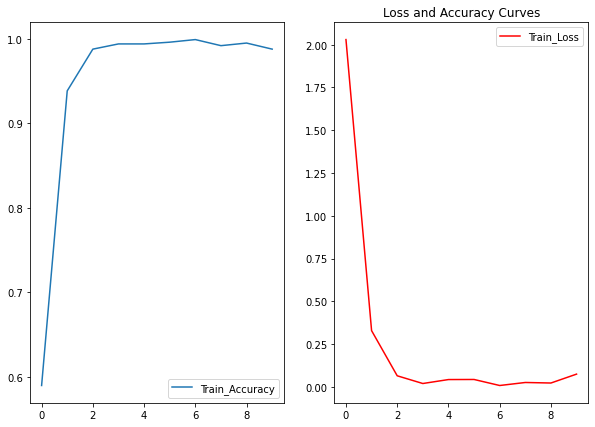

In [ ]:
plot_loss_curves(model_2_results.history)

In [ ]:
# saving model 2
model_2.save("/content/drive/MyDrive/Colab Notebooks/model_2_effnetv2b0.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [7]:
loaded_model = tf.keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/model_2_effnetv2b0.h5")
loaded_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 input_5 (InputLayer)        multiple                  0         
                                                                 
 efficientnetv2-b0 (Functio  (None, None, None, 1280   5919312   
 nal)                        )                                   
                                                                 
 flatten_3 (Flatten)         (None, 62720)             0         
                                                                 
 dense_3 (Dense)             (None, 5)                 313605    
                                                                 
Total params: 6232917 (23.78 MB)
Trainable params: 313605 (1.20 MB)
Non-trainable params: 5919312 (22.58 MB)
___________

In [ ]:
# creating data augmentation layer
data_augmentation_layer = tf.keras.Sequential([
    tf.keras.layers.RandomRotation(factor=0.3),
    tf.keras.layers.RandomFlip(mode="horizontal"),
    tf.keras.layers.RandomZoom(height_factor=(-0.2, -0.3)),
])
data_augmentation_layer

In [ ]:
tf.keras.utils.save_img("aug1.jpg", data_augmentation_layer(plt.imread("/content/ath.jpg")))

1/1 [==============================] - 0s 30ms/step


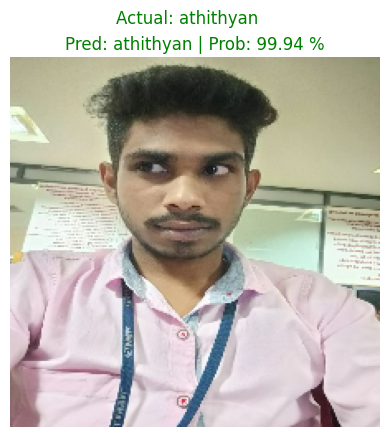

In [15]:
custom_image(img_path="/content/at2.jpg",
             model=loaded_model,
             org_class="athithyan")

In [ ]:
loaded_model.evaluate(test_dataset)

2/2 [==============================] - 4s 873ms/step - loss: 10.6164 - accuracy: 0.6667


[10.616357803344727, 0.6666666865348816]

In [ ]:
train_dataset.class_names

['adithiyaa',
 'ajay',
 'chandru',
 'kathir',
 'muthu vishal',
 'saravanan',
 'surya']

In [16]:
%%writefile app.py

import streamlit as st
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image
PAGE_CONFIG = {"page_title":"StColab.io","page_icon":":smiley:","layout":"centered"}
st.beta_set_page_config(**PAGE_CONFIG)
# All the plant species in the trained dataset
labels = [
	'Chandru',
  'Muthu Vishal',
    'Saravanan',
    'athithyan',
    'prakash']

# Function to predict the species of the plant based on the trained model and input image
def prediction(img_path, model):
	# Image pre-processing
    img = tf.io.read_file(img_path)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.resize(img, size=(224, 224))
    img = tf.expand_dims(img, axis=0)

    pred_probs = model.predict(img)
    pred_class = pred_probs.argmax(axis=1).item()
    pred_class = labels[pred_class]
    pred_prob = pred_probs.max(axis=1)[0]*100
    return pred_class, pred_prob


def main():
    st.title("Criminal Image Classifier")
    image_file = st.file_uploader("Upload the Image...")
    if (st.button("Predict")):
        if image_file is not None:
            c1, c2 = st.columns([1,5])
            with c1:
                img = Image.open(image_file)
                st.image(img, caption="Uploaded Image", width=100)
            with c2:
                with open(image_file.name, "wb") as f:
                    f.write(image_file.getbuffer())
                st.write("Classifying...")
                model = tf.keras.models.load_model("model_2_effnetv2b0.h5", compile=False)
                pred_class, pred_prob = prediction(image_file.name, model)
                if(pred_prob<0.5):
                    st.info("Low accuracy warning!")
                    st.success(f"Prediction: {pred_class.capitalize()}\n\nProbability: {pred_prob:.2f}%")
                else:
                    st.success(f"Prediction: {pred_class.capitalize()}\n\nProbability: {pred_prob:.2f}%")
        else:
            st.write(""" Please upload an image. """)

if __name__=='__main__':
	main()

Writing app.py
